# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# Import your libraries
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [4]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0       (0.3567527710143068, 0.8366274697659716)
1    (12.157846212851283, 0.0022906421029320716)
2       (1.0042924924225844, 0.6052302915364933)
3       (0.9587485722839265, 0.6191706943071515)
4        (0.292639260709308, 0.8638815362895094)
dtype: object

#### Interpret the normaltest results and make your observations.

In [5]:
#Explain the test results here

###INFO I FOUND
# Dada la hipótesis nula de que x provenía de una distribución normal
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

###ANSWER
# With the values that we have, the tests seem to come from a normal distribution. 
# The p-values are not small enough to dispprove that the data comes from a normal distribution.

#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

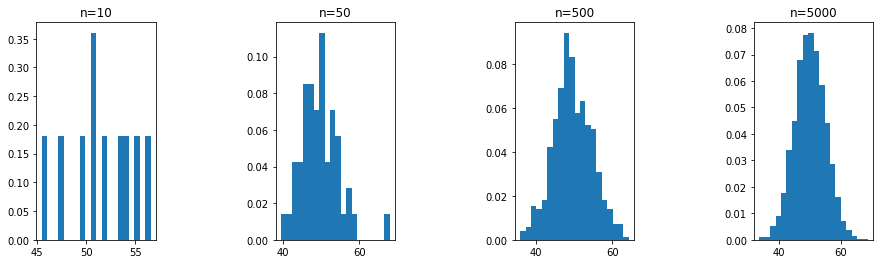

In [6]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [7]:
# Your comment and explanation here

# The bigger the sample, the distribution gets closer to a normal one.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

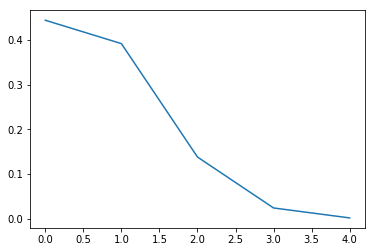

In [8]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [9]:
# Your comment here

# In the x-axis we see the number of people, and in the Y-axis we have the probability of looking a Youtbe ad. 
# The probability decreases, so the most probable thing is that people don't look at the Youtube ad
# since the probability is only 0.15.

#### Now plot PMP with 50, 500, and 5000 visitors.

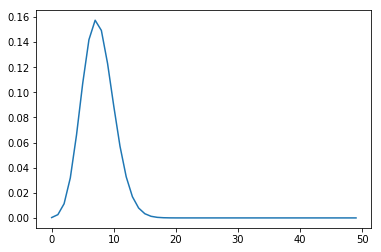

In [10]:
# Your code here

from scipy.stats import binom

n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

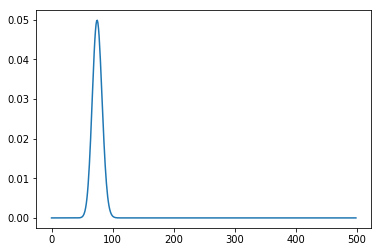

In [11]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

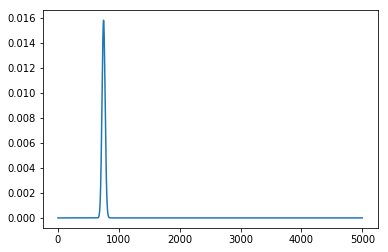

In [12]:

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [13]:
# Your comment here

# The bigger the sample, the less probability there is that 0 person or all of them click in an ad
# or the bigger the probability is that somebody will look at the ad.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [14]:
# Your comment here

# We know the average time, but not the exact time. For example in the exercise below, 
# we know that in ONE day we have an average 300 visits, but not at what time of the day that happens.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [15]:
# Your code here

stats.poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [20]:
# Your code here

stats.poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

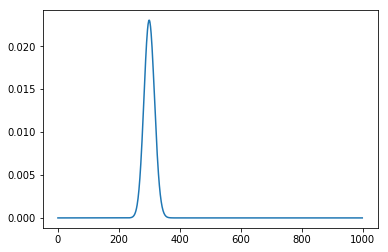

In [17]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [18]:
# Your answer here

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [19]:
# Your answer here